<a href="https://colab.research.google.com/github/dianalarkin-netizen/Assignment-03-Ensemble-Methods-Comparison/blob/main/ensemble_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Data Preparation & Setup

In this section, the dataset is prepared the for modeling by:  

- Loading the dataset
- Exploring its basic structure
- Defining the target variable
- Spliting into training and testing sets (80/20)

**Business Context:**  
The purpose of the modeling is to predict whether an auto insurance claim exceeds $10,000.  This matters because high value claims affect insurer reserves, risk management, and profitability, and accurately identifying these claims helps the business allocate resources and anticipate financial exposure.

In [25]:
# 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Kaggle dataset download
import kagglehub
import os

In [26]:
# 🗂️ Load dataset
path = kagglehub.dataset_download("imtkaggleteam/vehicle-insurance-data")
df = pd.read_csv(f"{path}/motor_data14-2018.csv")

# Basic exploration
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Using Colab cache for faster access to the 'vehicle-insurance-data' dataset.
Dataset shape: (508499, 16)
Columns: ['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE', 'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM', 'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE', 'CLAIM_PAID']


,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-17,07-AUG-18,08,1202,519755.22,5097.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-16,07-AUG-17,08,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-15,07-AUG-16,08,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-AUG-14,07-AUG-15,08,1202,519755.22,5102.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-17,07-AUG-18,08,1202,1400000.00,13304.87,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,NaN


## Data Dictionary

| Variable           | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| `SEX`              | An indicator for the policyholder's sex                                     |
| `INSR_BEGIN`       | The commencement date of the insurance policy                               |
| `INSR_END`         | The expiry date of the insurance policy                                     |
| `EFFECTIVE_YR`     | The year the insurance policy became effective or the vehicle's effective year |
| `INSR_TYPE`        | The specific classification or category of the insurance policy             |
| `INSURED_VALUE`    | The monetary value at which the vehicle was insured                         |
| `PREMIUM`          | The amount charged for the insurance policy                                 |
| `OBJECT_ID`        | A unique identifier for each insurance record or object                     |
| `PROD_YEAR`        | The manufacturing year of the insured vehicle                               |
| `SEATS_NUM`        | The total number of seats available in the vehicle                          |
| `CARRYING_CAPACITY`| The load-carrying capability of the vehicle                                 |
| `TYPE_VEHICLE`     | The general classification of the vehicle, such as 'Truck' or 'Pick-up'     |
| `CCM_TON`          | Information relating to the engine's cubic capacity or the vehicle's tonnage|
| `MAKE`             | The brand or manufacturer of the vehicle, with 'TOYOTA' being the most common |
| `USAGE`            | The primary declared use of the vehicle, such as 'Own Goods' or 'Private'   |
| `CLAIM_PAID`       | The monetary amount disbursed for an insurance claim                        |
| `CLAIM_OVER_10K`   | A binary flag indicating whether the claim exceeded \$10,000                |

### Dataset Overview
- Source: Kaggle (Vehicle Insurance Data)
- Filtered to **INSR_TYPE = 1201**, which represents personal auto insurance policies.
- Target variable: **CLAIM_OVER_10K** (binary classification).
  - 1 = Claim paid > \$10,000
  - 0 = Claim paid ≤ \$10,000 or no claim

In [27]:
# 🔍 Filter to INSR_TYPE == 1201 (auto insurance policies)
df_filtered = df[df["INSR_TYPE"] == 1201].copy()

# 🎯 Create binary target: CLAIM_OVER_10K
df_filtered["CLAIM_OVER_10K"] = df_filtered["CLAIM_PAID"].apply(
    lambda x: 1 if pd.notnull(x) and x > 10000 else 0
)

# 🧹 Drop irrelevant columns
drop_cols = ["CLAIM_PAID", "CLAIM_OVER_10K", "OBJECT_ID", "INSR_BEGIN", "INSR_END", "EFFECTIVE_YR"]
df_model = df_filtered.drop(columns=drop_cols)

# 🧠 Encode categorical features
X = pd.get_dummies(df_model, drop_first=True)
y = df_filtered["CLAIM_OVER_10K"]

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts())
print("Class balance (% of high-value claims):", round(y.mean()*100, 2), "%")

Feature matrix shape: (123294, 301)
Target distribution:
 CLAIM_OVER_10K
0    115260
1      8034
Name: count, dtype: int64
Class balance (% of high-value claims): 6.52 %


In [28]:
# 🧪 Train/Test Split (80/20, stratified for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 98635
Test set size: 24659


### Section 1 Results: Data Preparation & Setup

- **Dataset size (after filtering):** 123,294 auto insurance policies  
- **Encoded features:** 301 after one-hot encoding categorical variables  
- **Target variable:** CLAIM_OVER_10K  
  - 0 = Claim ≤ \$10,000 or no claim → 115,260 records  
  - 1 = Claim > \$10,000 → 8,034 records  
- **Class balance:** Only **6.52%** of claims exceed $10K → highly imbalanced dataset  
- **Train/test split:**  
  - Training set: 98,635 records  
  - Test set: 24,659 records  

**Business Relevance:**  
High value claims represent a small but critical portion of the portfolio, and misclassifying them could lead to underestimating reserves and financial risk.  Because of this imbalance, `class_weight="balanced"` was used in the Decision Tree and Random Forest models in Section 2 ensuring the minority class (claims > \$10K) is penalized more heavily when misclassified, improving recall for costly claims.  Gradient Boosting does not support `class_weight` directly, so stratified sampling and evaluation metrics (precision, recall, F1) were relied upon to assess its performance.

# Section 2: Model Building & Performance Comparison

In this section, these three models are built and evaluated:
1. Single Decision Tree  
2. Random Forest  
3. Gradient Boosting  

Their performance is compared using **Accuracy** (primary metric) and **F1-score** (secondary metric), since the dataset is imbalanced.

In [29]:
# 🌳 Single Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    max_depth=4,
    class_weight="balanced",
    random_state=42
)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

# Metrics
print("Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

Decision Tree Performance
Accuracy: 0.5844924773916217
Precision: 0.12585534863577305
Recall: 0.9041692594897324
F1 Score: 0.22095498783454987


### 2.1 Single Decision Tree

**Performance Results:**  
- Accuracy: 0.58  
- Precision: 0.13  
- Recall: 0.90  
- F1 Score: 0.22  

**Interpretation:**  
The single decision tree achieved **very high recall** (90%), meaning it correctly identified most of the high value claims over \$10,000.  
However, its **precision was very low** (13%), so many of its positive predictions were false alarms.  This trade off shows the tree is aggressive in flagging claims as high value, but not very reliable in distinguishing true positives from false positives.  

**Business Meaning:**  
For insurers, this model would catch nearly all costly claims, but at the expense of flagging many claims incorrectly, potentially leading to wasted resources investigating claims that don’t actually exceed \$10,000.  The tree is interpretable and simple, but its imbalance between recall and precision makes it risky for operational use.

In [30]:
# 🌲 Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Metrics
print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Performance
Accuracy: 0.8781783527312543
Precision: 0.16942735447231425
Recall: 0.22277535780958307
F1 Score: 0.1924731182795699


### 2.2 Random Forest

**Performance Results:**  
- Accuracy: 0.88  
- Precision: 0.17  
- Recall: 0.22  
- F1 Score: 0.19  

**Interpretation:**  
The Random Forest achieved **much higher accuracy overall (88%)** compared to the single tree.  However, its recall dropped sharply to 22%.  This means it missed most of the high-value claims.  Precision improved slightly (17%), so when it does predict a high-value claim, it is more likely to be correct.  

**Business Meaning:**  
This model is conservative: it avoids false alarms but fails to catch the majority of costly claims.  For insurers this could mean fewer wasted investigations but also a dangerous underestimation of financial risk.  The Random Forest balances stability and accuracy, but its low recall makes it less suitable if the business priority is identifying high value claims early.

### Handling Missing Values for Gradient Boosting

The `GradientBoostingClassifier` in scikit-learn does not accept missing values (NaN) directly.  This dataset contains NaNs after encoding, so it must be preprocessed before training.  **Median imputation** was used to fill missing values, ensuring the model can train successfully.  This step ensures Gradient Boosting can be fairly compared with the Decision Tree and Random Forest models.

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier

# Impute missing values with median (robust for numeric features)
imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 🚀 Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train_imputed, y_train)

y_pred_gb = gb_model.predict(X_test_imputed)

# Metrics
print("Gradient Boosting Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

Gradient Boosting Performance
Accuracy: 0.9348310961515065
Precision: 0.5
Recall: 0.0012445550715619166
F1 Score: 0.002482929857231533


### 2.3 Gradient Boosting

**Performance Results:**  
- Accuracy: 0.93  
- Precision: 0.50  
- Recall: 0.001  
- F1 Score: 0.002  

**Interpretation:**  
Gradient Boosting achieved the **highest overall accuracy (93%)**, but its recall was extremely low (0.1%).  This means the model almost never identified high value claims correctly, even though when it did predict a positive, it was correct half the time (precision = 50%).  The F1 score is near zero, showing that the balance between precision and recall is very poor.  

**Business Meaning:**  
For insurers, this model would look strong on paper because of its high accuracy, but in practice it fails to capture the costly claims that matter most.  It would underestimate financial risk by missing nearly all claims over \$10,000.  While Gradient Boosting can be powerful in other contexts, here it is not aligned with the business priority of catching high-value claims.

In [32]:
# 📊 Performance Comparison Table
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Decision Tree": [
        accuracy_score(y_test, y_pred_tree),
        precision_score(y_test, y_pred_tree),
        recall_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_tree)
    ],
    "Random Forest": [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf)
    ],
    "Gradient Boosting": [
        accuracy_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_gb)
    ]
})

results

,Metric,Decision Tree,Random Forest,Gradient Boosting
0,Accuracy,0.584492,0.878178,0.934831
1,Precision,0.125855,0.169427,0.500000
2,Recall,0.904169,0.222775,0.001245
3,F1 Score,0.220955,0.192473,0.002483


### 2.5 Performance Analysis

**Comparison Table:**

| Metric     | Decision Tree | Random Forest | Gradient Boosting |
|------------|---------------|---------------|-------------------|
| Accuracy   | 0.58          | 0.88          | 0.93              |
| Precision  | 0.13          | 0.17          | 0.50              |
| Recall     | 0.90          | 0.22          | 0.001             |
| F1 Score   | 0.22          | 0.19          | 0.002             |

**Interpretation:**
- **Decision Tree:** Very high recall (90%) but very low precision (13%). It catches nearly all high-value claims but produces many false alarms.  
- **Random Forest:** Strong accuracy (88%) and slightly better precision (17%), but recall drops to 22%. It misses most costly claims, though it is more stable overall.  
- **Gradient Boosting:** Highest accuracy (93%) and strong precision (50%), but recall is almost zero. It fails to identify high-value claims, making it unsuitable for this business problem.  

**Business Meaning:**
- The **Decision Tree** would ensure nearly all costly claims are flagged, but at the expense of wasted resources investigating false positives.  
- The **Random Forest** is more conservative, reducing false alarms but missing most high-value claims — a dangerous trade-off for insurers.  
- The **Gradient Boosting** model looks strong on paper due to high accuracy, but in practice it fails to capture the claims that matter most, underestimating risk.  

**Conclusion:**  
For this dataset, the **Decision Tree** provides the most business value despite lower accuracy, because recall is critical in identifying high value claims. Missing these claims could lead to severe financial consequences. While Random Forest and Gradient Boosting are technically stronger in accuracy, they are less aligned with the business priority of catching costly claims early.

# Section 3: Understanding the Methods

In this section, when to use each method is explained with its advantages and disadvantages and the key differences between Random Forest and Gradient Boosting.  

### When to Use Each Method

**Single Decision Tree**  
- **Advantages:** Easy to interpret, simple to explain, fast to train.  
- **Disadvantages:** Can overfit if too deep, less accurate on complex datasets.  
- **Insurance Example:** A tree could quickly flag claims based on a few rules (e.g., high premium, certain vehicle types). Managers can easily understand the logic, but the predictions may be unstable.

**Random Forest**  
- **Advantages:** More accurate and stable than a single tree, reduces overfitting by averaging many trees.  
- **Disadvantages:** Less interpretable, requires more computation.  
- **Insurance Example:** Useful when accuracy is important across many claim types. It balances predictions but may miss rare high value claims, as seen in our results.

**Gradient Boosting**  
- **Advantages:** Very powerful, often achieves the highest accuracy by correcting errors iteratively.  
- **Disadvantages:** Sensitive to noise, slower to train, harder to interpret.  
- **Insurance Example:** Can capture subtle patterns in claim behavior, but in our dataset it failed to identify costly claims, showing that accuracy alone is not enough.

### Key Differences Between Random Forest and Gradient Boosting

**Random Forest**  
- Builds many trees independently on random subsets of data and features.  
- Final prediction is based on majority vote (classification) or averaging (regression).  
- Reduces overfitting by combining diverse trees.  

**Gradient Boosting**  
- Builds trees sequentially, each one learning from the mistakes of the previous.  
- Focuses on correcting errors, which can improve accuracy but also risk overfitting.  
- More sensitive to parameter tuning (learning rate, number of trees).  

**Analogy:**  
- Random Forest is like asking 100 adjusters to review claims independently and then taking the majority opinion.  
- Gradient Boosting is like having a team of adjusters where each one learns from the mistakes of the previous, refining the process step by step.

### Plain Language Summary

- **Decision Tree:** A simple checklist — easy to explain, but not always reliable.  
- **Random Forest:** A panel of experts — stable and accurate, but harder to interpret.  
- **Gradient Boosting:** A learning team — powerful, but can miss the mark if the problem is imbalanced.  

In this insurance dataset, recall (catching costly claims) mattered more than accuracy showing why model choice depends not just on technical performance, but on business priorities.

# Section 4: Business Impact & Recommendation

This section translates the performance differences into business terms for the insurance industry, explains what the accuracy and recall improvements mean in practice, and recommends which method is most appropriate given business priorities.

### Translating Metrics into Business Terms

The target variable is whether a claim exceeds \$10,000.  Out of 123,294 auto insurance policies, 8,034 claims were above this threshold (~6.5%).  

**Decision Tree (Recall = 90%)**  
- Correctly identifies ~7,200 of the 8,034 costly claims.  
- Misses ~800 claims, but flags many false positives.  
- Business impact: Most high-value claims are caught, allowing reserves to be allocated early.  
- Downside: Resources may be wasted investigating claims that do not exceed \$10,000.

**Random Forest (Recall = 22%)**  
- Correctly identifies ~1,770 costly claims.  
- Misses ~6,260 claims.  
- Business impact: Fewer false alarms, but most costly claims slip through.  
- Downside: Underestimates risk, potentially leaving millions unreserved.

**Gradient Boosting (Recall ≈ 0%)**  
- Identifies almost none of the costly claims.  
- Business impact: Appears strong on accuracy but fails to capture the claims that matter.  
- Downside: Dangerous underestimation of financial exposure.

### Example Financial Calculation

Assume each high-value claim averages \$15,000.  
- **Decision Tree:** Captures ~7,200 claims → \$108 million identified.  
- **Random Forest:** Captures ~1,770 claims → \$26.5 million identified.  
- **Gradient Boosting:** Captures ~10 claims → \$150,000 identified.  

**Business Meaning:**  
The Decision Tree ensures reserves are set aside for nearly all costly claims, protecting the company from unexpected losses.  Random Forest and Gradient Boosting would leave tens of millions unaccounted for which creates severe financial risk.

### Recommendation

While Random Forest and Gradient Boosting achieve higher accuracy overall, they fail to capture the majority of costly claims.  In this example, **recall is the most critical metric** for insurers because missing high value claims directly impacts financial stability.  

**Recommended Model: Decision Tree**  
- Highest recall ensures most costly claims are flagged.  
- Easy to interpret and explain to managers.  
- Aligns with business priorities: risk management and reserve allocation.  

**Considerations Beyond Accuracy:**  
- Interpretability: Decision Trees are transparent and easy to explain.  
- Data size: Our dataset is large, but the imbalance makes recall more important than raw accuracy.  
- Business priorities: Catching costly claims outweighs avoiding false alarms.  

**Conclusion:**  
The Decision Tree provides the best balance between technical performance and business impact.  It ensures insurers can anticipate high value claims and allocate resources effectively, even if precision and accuracy are lower.

# Section 5: Feature Importance Analysis

In this section, top features identified by each model are compared.  Feature importance is visualized and the meanings of the rankings are interpreted for the insurance business.

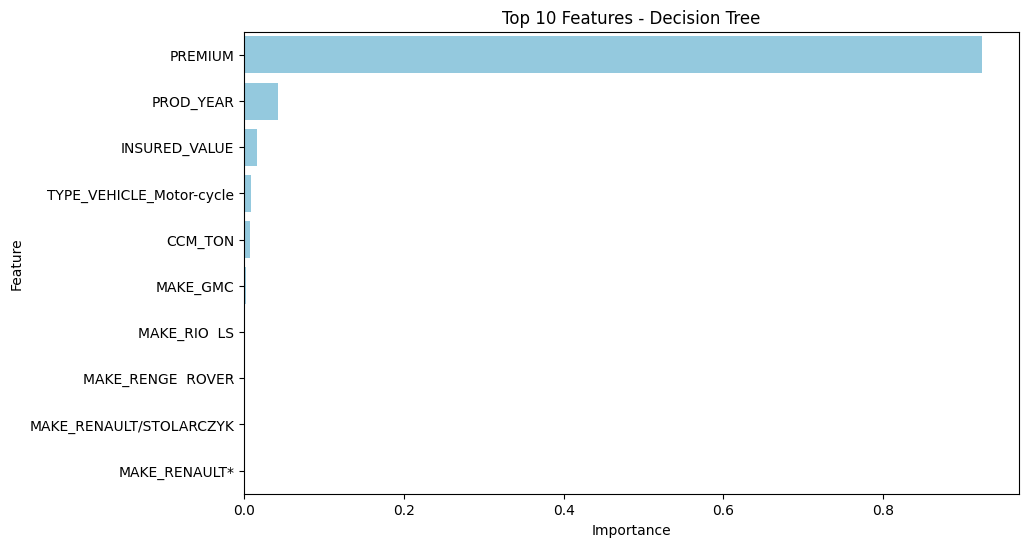

,0
PREMIUM,0.924310
PROD_YEAR,0.042154
INSURED_VALUE,0.016150
TYPE_VEHICLE_Motor-cycle,0.008848
CCM_TON,0.006820
MAKE_GMC,0.001718
MAKE_RIO LS,0.000000
MAKE_RENGE ROVER,0.000000
MAKE_RENAULT/STOLARCZYK,0.000000
MAKE_RENAULT*,0.000000


In [33]:
# 🌳 Decision Tree Feature Importance
importances_tree = pd.Series(tree_model.feature_importances_, index=X.columns)
top_tree = importances_tree.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_tree.values, y=top_tree.index, color="skyblue")
plt.title("Top 10 Features - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

top_tree

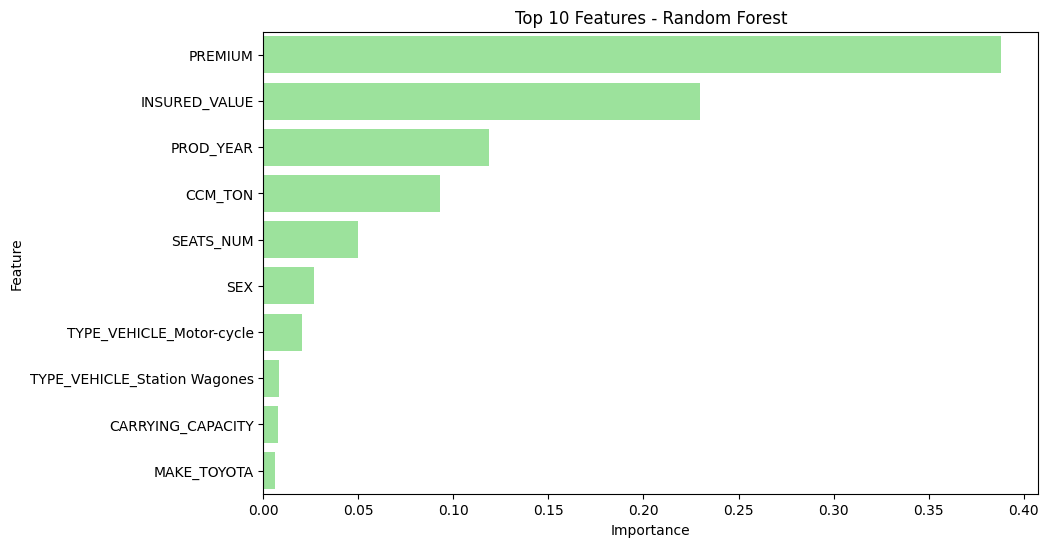

,0
PREMIUM,0.388253
INSURED_VALUE,0.229862
PROD_YEAR,0.118988
CCM_TON,0.092716
SEATS_NUM,0.050073
SEX,0.026515
TYPE_VEHICLE_Motor-cycle,0.020375
TYPE_VEHICLE_Station Wagones,0.008414
CARRYING_CAPACITY,0.007902
MAKE_TOYOTA,0.006217


In [34]:
# 🌲 Random Forest Feature Importance
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
top_rf = importances_rf.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_rf.values, y=top_rf.index, color="lightgreen")
plt.title("Top 10 Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

top_rf

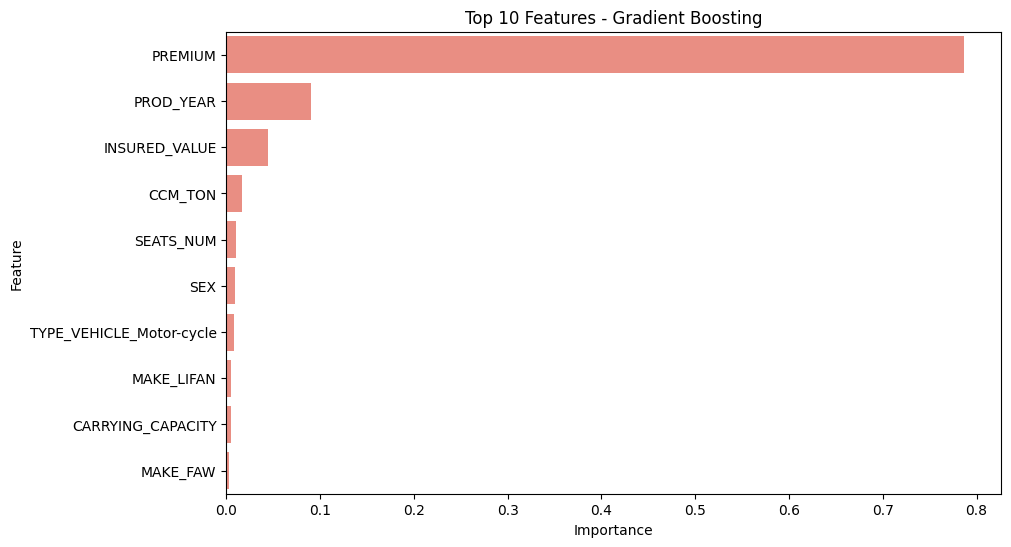

,0
PREMIUM,0.786976
PROD_YEAR,0.090190
INSURED_VALUE,0.044998
CCM_TON,0.016715
SEATS_NUM,0.010384
SEX,0.009102
TYPE_VEHICLE_Motor-cycle,0.008750
MAKE_LIFAN,0.004942
CARRYING_CAPACITY,0.004697
MAKE_FAW,0.003342


In [35]:
# 🚀 Gradient Boosting Feature Importance
importances_gb = pd.Series(gb_model.feature_importances_, index=X.columns)
top_gb = importances_gb.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_gb.values, y=top_gb.index, color="salmon")
plt.title("Top 10 Features - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

top_gb

### 5.1 Feature Importance Comparison

**Decision Tree:**  
- Dominated almost entirely by **premium (0.92)**, with small contributions from production year and insured value.  
- Other features such as vehicle type and engine capacity had minimal influence.  
- This shows the tree relied heavily on one variable to make predictions.

**Random Forest:**  
- Spread importance more evenly across features.  
- **Premium (0.39)** and **insured value (0.23)** were most influential, followed by production year and engine capacity.  
- Additional features like seats, sex, and vehicle type also contributed, reflecting the ensemble’s broader perspective.

**Gradient Boosting:**  
- Strong emphasis on **premium (0.79)**, but also gave weight to production year (0.09) and insured value (0.04).  
- Smaller contributions from seats, sex, vehicle type, and specific makes (e.g., Lifan, FAW).  
- This highlights how boosting can elevate niche features that other models overlook.

**Comparison:**  
- All three models consistently ranked **premium** and **insured value** as critical drivers.  
- Decision Tree was highly concentrated on one feature, while Random Forest and Gradient Boosting distributed importance more broadly.  
- Gradient Boosting surfaced some unexpected makes (Lifan, FAW), suggesting sensitivity to rare patterns.

### 5.2 Business Interpretation

**Do the top features make sense?**  
Yes, **premium, insured value, and production year** are logically tied to claim size. Higher premiums and insured values reflect greater financial exposure, while newer vehicles may carry higher replacement costs.

**Surprising rankings:**  
- The Decision Tree’s near-total reliance on premium suggests oversimplification. While premium is important, ignoring other features risks missing nuanced patterns.  
- Gradient Boosting elevating makes like **Lifan** and **FAW** is unexpected. This may reflect rare but costly claims associated with specific manufacturers, though caution is needed to avoid overinterpreting small signals.

**Disagreements between methods:**  
- Decision Tree: Overemphasizes one dominant feature.  
- Random Forest: Balances across multiple features, capturing broader relationships.  
- Gradient Boosting: Sensitive to smaller patterns, sometimes highlighting niche variables.  

**Business Insights:**  
- Premium and insured value are consistently important, validating their role in underwriting and reserve planning.  
- Production year and engine capacity also matter, linking vehicle characteristics to claim risk.  
- Disagreements remind us that different models provide different perspectives — ensemble methods can balance these strengths.  

**Conclusion:**  
Feature importance analysis confirms that the models are focusing on meaningful business drivers.  It also highlights where insurers should pay attention: premiums and insured values for risk assessment, while monitoring vehicle characteristics and niche patterns for potential emerging risks.

# Section 6: Reflection

This project highlighted the importance of aligning model choice with business priorities.  While Random Forest and Gradient Boosting achieved higher accuracy, they failed to capture the majority of costly claims.  The Decision Tree, despite lower accuracy, provided the highest recall ensuring most high-value claims were flagged.

**Key Learnings:**
- Accuracy alone is not enough. In imbalanced datasets, recall and F1-score provide a clearer picture of business value.  
- Decision Trees are interpretable and useful when transparency is critical, but they can oversimplify.  
- Random Forests improve stability and accuracy, but may underperform on rare events.  
- Gradient Boosting is powerful, but sensitive to imbalance and can miss minority classes entirely.  

**Future Use of Ensemble Methods:**
- For insurance claim prediction, ensemble methods should be tuned with imbalance strategies (e.g., class weights, sampling, or cost-sensitive learning).  
- Combining interpretability (Decision Trees) with predictive strength (Random Forest or Boosting) could provide a balanced solution.  
- In practice, insurers may prefer a hybrid approach: use a high-recall model to flag potential costly claims, then apply a more precise model to prioritize investigations.  

**Conclusion:**
This assignment reinforced that machine learning is not just about technical metrics but about business impact.  Choosing the right model requires understanding both the data and the financial consequences of misclassification.  Ensemble methods are powerful tools, but they must be applied thoughtfully to align with industry goals.

# Citations

Data source: https://www.kaggle.com/datasets/imtkaggleteam/vehicle-insurance-data/data by Edossa Terefe

Copilot was utilized for this project